In [1]:
import multiprocessing
import random
import time
from threading import current_thread

import rx
from rx.scheduler import ThreadPoolScheduler
from rx import operators as ops
from rx import create
import cbpro
from pymongo import MongoClient
import numpy as np
import dateutil.parser

import pandas as pd

In [2]:
mongo_client = MongoClient('mongodb://localhost:27017/')
db = mongo_client.cryptocurrency_database
BTC_collection = db.BTC_collection2
ACC_collection = db.ACC_collection 

In [3]:
docs = ACC_collection.find()
npvals = np.sort([[fd['price'], fd['size']] for fd in docs if float(fd["size"]) > 10 ])
x = np.sort(npvals[:, 1])
y = npvals[:, 0]

KeyError: 'size'

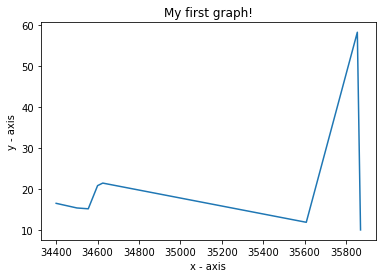

In [54]:
# importing the required module
import matplotlib.pyplot as plt
  
# # x axis values
# x = [1,2,3]
# # corresponding y axis values
# y = [2,4,1]
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
  
# giving a title to my graph
plt.title('My first graph!')
  
# function to show the plot
plt.show()

In [39]:
docs = ACC_collection.find()

In [40]:
docs.next()

{'_id': ObjectId('60ba97c4e3d2c41b9db40178'),
 'price': 34466.85,
 'size': 0.0030150900000000002}

In [55]:
ACC_collection_buy = db.ACC_collection_buy 
ACC_collection_sell = db.ACC_collection_sell

In [87]:
docsell = ACC_collection_sell.find()
npvalsell = np.sort([[fd['price'], fd['size']] for fd in docsell if float(fd["size"]) ])
x = np.sort(npvalsell[:, 1])
y = npvalsell[:, 0]

In [133]:
import ISODate

ModuleNotFoundError: No module named 'ISODate'

In [173]:
docsell = ACC_collection_sell.find( { 'datetime' : {'$lte': dateutil.parser.isoparse('2014-08-24T07:52:04.945306Z'), '$gte': dateutil.parser.isoparse('2014-09-24T07:51:04.958496Z')}})

In [174]:
dateutil.parser.isoparse('2014-09-24T07:52:04.945306Z')

datetime.datetime(2014, 9, 24, 7, 52, 4, 945306, tzinfo=tzutc())

In [175]:
docsell.next()

StopIteration: 

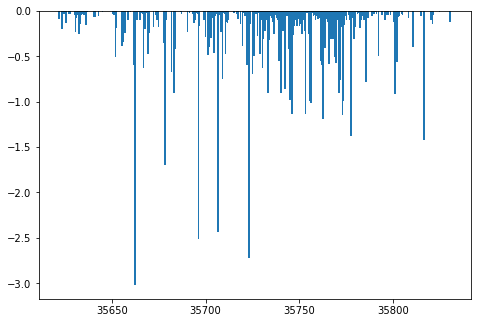

In [88]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.show()

In [76]:
b = BTC_collection.find()

In [80]:
b.next()

{'_id': ObjectId('60b4555328938b1920a0a92d'),
 'type': 'ticker',
 'sequence': 25784465767,
 'product_id': 'BTC-USD',
 'price': '34461.31',
 'open_24h': '34789.78',
 'volume_24h': '14701.10322518',
 'low_24h': '34287.18',
 'high_24h': '36500',
 'volume_30d': '894738.53316694',
 'best_bid': '34461.30',
 'best_ask': '34461.31',
 'side': 'buy',
 'time': '2021-05-31T03:13:43.010030Z',
 'trade_id': 181491840,
 'last_size': '0.00277843'}

In [81]:
docsell = ACC_collection_sell.find()
docsell.next()

{'_id': ObjectId('60bbe5e36f6c9d0948a95698'),
 'price': 35830.6,
 'size': -0.09495963999999998}

In [91]:
time = '2021-05-31T03:13:43.010030Z'

In [92]:
from datetime import *

time = datetime.strptime("03/02/21 16:30", "%d/%m/%y %H:%M")
print("Time = {:d}:{:02d}".format(time.hour, time.minute))

Time = 16:30


In [93]:
datetime.fromisoformat(time)

TypeError: fromisoformat: argument must be str

In [97]:
import dateutil.parser
dateutil.parser.isoparse('2008-09-03T20:56:35.450686Z')

datetime.datetime(2008, 9, 3, 20, 56, 35, 450686, tzinfo=tzutc())

In [102]:
time = '2021-05-31T03:13:43.010030Z'

In [110]:

dt = dateutil.parser.isoparse(time)

In [111]:
dt

datetime.datetime(2021, 5, 31, 3, 13, 43, 10030, tzinfo=tzutc())

In [112]:
print("Time = {:d}:{:02d}".format(dt.hour, dt.minute))

Time = 3:13


In [113]:
dt.isoformat()

'2021-05-31T03:13:43.010030+00:00'

In [114]:
dt = dt.replace(second=0, microsecond=0) 

In [115]:
dt.isoformat()

'2021-05-31T03:13:00+00:00'

In [118]:
td = db.TD

In [123]:
td.delete_many({})

In [128]:

td.find_one_and_update({ "price" : 3, "datetime" : dt },
{"$inc": 
    {"size": 2}
},upsert=True)

{'_id': ObjectId('60bbef586f6c9d0948aa2798'),
 'datetime': datetime.datetime(2021, 5, 31, 3, 13),
 'price': 3,
 'size': 3}

In [129]:

td.find().next()

{'_id': ObjectId('60bbef586f6c9d0948aa2798'),
 'datetime': datetime.datetime(2021, 5, 31, 3, 13),
 'price': 3,
 'size': 5}

In [182]:
docsell = ACC_collection_sell.find()

In [185]:
allsell = [r for r in docsell]

In [186]:
len(allsell)

5779

In [187]:
allsell[-1]

{'_id': ObjectId('60bbf3eb6f6c9d0948aa8119'),
 'datetime': datetime.datetime(2021, 6, 5, 22, 0, 19, 162000),
 'price': 34992.88,
 'size': -0.05}

In [241]:
import datetime

In [245]:
# data = [r for r in allsell[:] if r['buy_size'] > 0 and r['sell_size'] < 0]

In [247]:
# data

In [248]:
#ACC_collection.delete_many({})

In [249]:
import pandas as pd

In [19]:
def aggregateByFreq(frequency, df):
    aggdf = df.groupby(pd.Grouper(freq=frequency))[["volume"]].sum()
    aggmdf = df.groupby(pd.Grouper(freq=frequency))[["vmap"]].mean()
    aggdf["price"] = (aggdf["volume"] * aggmdf["vmap"]) / aggdf["volume"]
    return aggdf

In [76]:
# dsell = ACC_collection_sell.find({"datetime": {"$gt": datetime.datetime(2020, 12, 1)}})
acc = ACC_collection.find({"datetime": {"$lt": dateutil.parser.isoparse('2021-06-06T00:00:00.450686Z')}})


In [125]:
acc = ACC_collection.find({"datetime": {"$lt": dateutil.parser.isoparse('2021-06-06T22:19:35.450686Z')
                                       ,"$gt": dateutil.parser.isoparse('2021-06-05T22:17:00.450686Z')}})

In [4]:
acc = ACC_collection.find({"datetime": {"$lt": dateutil.parser.isoparse('2021-06-08T22:19:35.450686Z')
                                       ,"$gt": dateutil.parser.isoparse('2021-06-06T03:00:00.450686Z')}})

allsell = [r for r in acc]
data = [r for r in allsell[:]]

df = pd.DataFrame.from_records(data, columns=["datetime", "price", "buy_size", "sell_size"])

### let's do the volume first by minute

bsdf = df.groupby(pd.Grouper(key='datetime',freq='Min'))[["buy_size", "sell_size"]].sum()

mpdf = df.groupby(pd.Grouper(key='datetime',freq='Min'))[["price"]].mean()


vmap_volume = bsdf["buy_size"] + np.abs(bsdf["sell_size"])

vol = pd.DataFrame(vmap_volume, columns=["vmap_volume"])

vmap = ((bsdf["buy_size"] + np.abs(bsdf["sell_size"])) * mpdf["price"]) / (bsdf["buy_size"] + np.abs(bsdf["sell_size"]))

In [39]:
df2 = df.set_index('datetime')

In [ ]:
df.groupby(["Group", "Size"])

In [40]:
df2

,price,buy_size,sell_size
datetime,,,
2021-06-06 15:49:00,36111.86,0.001366,0.000000
2021-06-06 15:49:00,36112.77,0.002640,0.000000
2021-06-06 15:49:00,36107.52,0.000000,-0.039520
2021-06-06 15:49:00,36107.13,0.000000,-0.050754
2021-06-06 15:50:00,36109.72,0.004378,0.000000
...,...,...,...
2021-06-08 11:40:00,32951.79,0.000000,-0.018619
2021-06-08 11:40:00,32951.23,0.000000,-0.009960
2021-06-08 11:40:00,32950.70,0.000000,-0.034079


In [51]:
ss = df2.loc['2021-06-06 15:50:00':'2021-06-06 15:50:00'].sort_values('price', ascending=False)[:50]

In [267]:
tmp_collection = db.TMP

<bound method Database.get_collection of Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'cryptocurrency_database')>

In [78]:
ss["price"][:5]

datetime
2021-06-06 15:50:00    36115.48
2021-06-06 15:50:00    36114.75
2021-06-06 15:50:00    36114.74
2021-06-06 15:50:00    36114.34
2021-06-06 15:50:00    36114.32
Name: price, dtype: float64

In [81]:
36114.74 - 36114.34

0.4000000000014552

In [71]:
start.values[0]

36115.48

In [ ]:
crea

In [96]:
diffs = np.empty([0])

In [100]:
np.append(diffs, 1)

array([1.])

In [99]:
np.insert(diffs, 1)

TypeError: _insert_dispatcher() missing 1 required positional argument: 'values'

In [112]:
diffs = []
start = ss["price"][:1].values[0]
for v1 in [v for v in ss["price"][1:]]:
    diffs.append(abs(v1-start))
    start = v1
    
ndiffs = np.array(diffs)    

In [113]:
diffs[:5]

[0.7300000000032014,
 0.010000000002037268,
 0.4000000000014552,
 0.01999999999679858,
 0.20999999999912689]

In [15]:
# vmap = (vol["vmap_volume"] * mpdf["price"]) / vol["vmap_volume"]

In [16]:
bsdf["volume"] = vol
bsdf["vmap"] = vmap

<AxesSubplot:xlabel='datetime'>

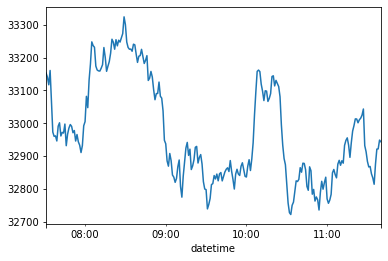

In [17]:
delta = bsdf["buy_size"] + bsdf["sell_size"]
bsdf["delta"] = delta
bsdf["vmap"][-250:].plot.line()

# deltabar.loc['2021-06-07 04:45:00':'2021-06-08 09:05:00'].plot.bar()

In [20]:
ndf = aggregateByFreq('5Min', bsdf)
ndf

,volume,price
datetime,,
2021-06-06 15:45:00,0.094280,36109.820000
2021-06-06 15:50:00,12.664272,36125.442896
2021-06-06 15:55:00,43.120294,36180.076725
2021-06-06 16:00:00,31.672957,36220.882616
2021-06-06 16:05:00,17.982698,36254.655585
...,...,...
2021-06-08 11:20:00,62.169669,33006.268340
2021-06-08 11:25:00,53.707351,32985.812807
2021-06-08 11:30:00,52.794414,32859.482034


<AxesSubplot:xlabel='datetime'>

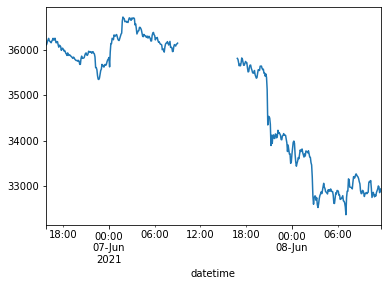

In [21]:
ndf["price"].plot.line()

<AxesSubplot:xlabel='datetime'>

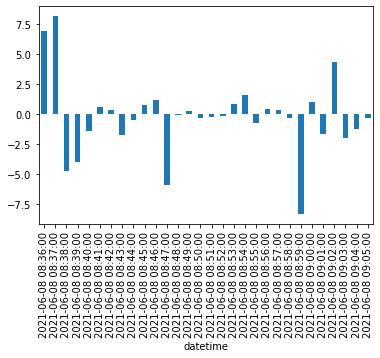

In [22]:
deltabar = bsdf.groupby(pd.Grouper(freq='Min'))["delta"].sum()
# deltabar[-25:].plot.bar()

deltabar.loc['2021-06-07 05:30:00':'2021-06-08 09:05:00'][-30:].plot.bar()

In [23]:
bsdf

,buy_size,sell_size,volume,vmap,delta
datetime,,,,,
2021-06-06 15:49:00,0.004006,-0.090274,0.094280,36109.820000,-0.086268
2021-06-06 15:50:00,1.679846,-1.174185,2.854031,36104.556933,0.505661
2021-06-06 15:51:00,0.414902,-0.484109,0.899012,36128.086842,-0.069207
2021-06-06 15:52:00,2.770523,-0.037961,2.808484,36111.808333,2.732562
2021-06-06 15:53:00,1.799422,-0.483620,2.283042,36137.207077,1.315802
...,...,...,...,...,...
2021-06-08 11:36:00,3.409286,-3.264690,6.673976,32875.571774,0.144596
2021-06-08 11:37:00,6.257361,-1.859532,8.116893,32921.084020,4.397829
2021-06-08 11:38:00,3.197374,-2.274677,5.472051,32921.854386,0.922697


In [279]:
36140 - 35474

666

In [274]:
36140 - 35820

320

In [456]:
sjs

array([[  34810.        ,  -42082.23445143],
       [  34900.        ,  -19700.43439271],
       [  34910.        ,  -10120.46875708],
       [  34930.        ,   -8567.44777817],
       [  34960.        ,   -5523.55092954],
       [  34980.        ,   -5163.35741825],
       [  34980.        ,   -4494.64240215],
       [  35020.        ,   -3754.48048093],
       [  35190.        ,   -3378.02662033],
       [  35440.        ,    3673.79347401],
       [  35520.        ,    3703.51533434],
       [  35540.        ,    4217.7734796 ],
       [  35610.        ,    5087.94469751],
       [  35750.        ,    6479.57142857],
       [  35790.        ,    7085.43652133],
       [  35790.        ,   11117.78007707],
       [  35830.        ,   11383.60120929],
       [  35840.        ,   12338.67836852],
       [  35880.        ,   12969.48598631],
       [  35910.        ,   13160.14852662],
       [  35970.        ,   14865.74065055],
       [  36020.        ,   22437.72425   ],
       [  

In [235]:
2 * (36126 - 35471)

1310

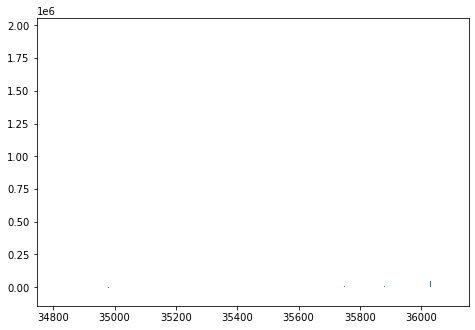

In [455]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.show()

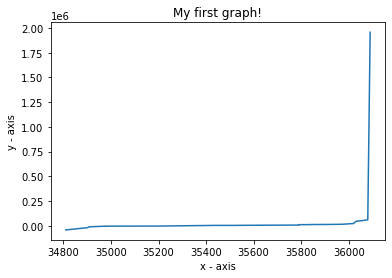

In [454]:
# importing the required module
import matplotlib.pyplot as plt
  
# # x axis values
# x = [1,2,3]
# # corresponding y axis values
# y = [2,4,1]
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
  
# giving a title to my graph
plt.title('My first graph!')
  
# function to show the plot
plt.show()

In [120]:
for i in range(60):
    if(i % 10 == 0):
        print(i)

0
10
20
30
40
50


In [117]:
60 % 12

0

In [143]:
acc = BTC_collection.find({"time": {"$lt": dateutil.parser.isoparse('2021-06-13T16:00:35.450686Z')
                                       ,"$gt": dateutil.parser.isoparse('2021-06-01T16:00:00.450686Z')}})


In [229]:
docs = BTC_collection.find({
        "$or" : [
            {"type": "ticker"}, {"time" : { "$gt" : dateutil.parser.isoparse('2021-06-12T16:00:00.450686Z')}}
        ]
    })


In [243]:
docs = BTC_collection.find({
            "datetime" : { "$gt" : dateutil.parser.isoparse('2021-06-12T16:00:00.450686Z')  }  
})

In [231]:
docs = BTC_collection.find({
            "type": "ticker", "datetime" : '2021-05-31T03:13:44.025604Z'
    }
)

In [215]:
docs = BTC_collection.find({
            "time" : {"$gt" : dateutil.parser.isoparse('2021-05-31T03:13:44.025604Z')}
    }
)

In [250]:
docs.next()

{'_id': ObjectId('60c4e36517be568b38c82f98'),
 'datetime': datetime.datetime(2021, 6, 12, 16, 40),
 'price': 35460.63,
 'buy_size': 0,
 'sell_size': -0.026}

In [247]:
docs = ACC_collection.find({
            "datetime" : {"$gt" : dateutil.parser.isoparse('2021-06-12T15:00:44.025604Z')}
    }
)

In [248]:
docs.next()

{'_id': ObjectId('60c4e36417be568b38c82f93'),
 'datetime': datetime.datetime(2021, 6, 12, 16, 40),
 'price': 35466.6,
 'buy_size': 0.00684344,
 'sell_size': 0}

In [365]:
acc = BTC_collection.find({
            "datetime" : { "$gt" : dateutil.parser.isoparse('2021-06-12T18:20:00.450686Z')  }  
})
data = [r for r in acc]
df = pd.DataFrame.from_records(data, columns=["datetime", "price", "size", "side"])
#df.set_index(['datetime'], inplace=True)

In [366]:
df

,datetime,price,size,side
0,2021-06-12 18:20:00.603,35855.39,0.544552,sell
1,2021-06-12 18:20:00.603,35855.00,0.992419,sell
2,2021-06-12 18:20:00.738,35855.00,1.007581,sell
3,2021-06-12 18:20:00.738,35855.00,0.059228,sell
4,2021-06-12 18:20:00.919,35850.01,0.074405,buy
...,...,...,...,...
44812,2021-06-13 05:28:13.844,35014.86,0.000114,buy
44813,2021-06-13 05:28:14.084,35014.86,0.000669,buy
44814,2021-06-13 05:28:15.092,35015.98,0.001365,buy
44815,2021-06-13 05:28:15.836,35013.55,0.003774,buy


In [324]:
tdate = dateutil.parser.isoparse('2021-06-12T16:25:32.450686Z')

In [367]:
def transform(row):
    def secondize(x, freq):
        if (x % freq) == 0:
            return(x)
        else:
            return(int(x/freq) * freq)

    d = row["datetime"]
    dt = d.replace(second=secondize(d.second, 15), microsecond=0)
    row["datetime"] = dt
    row["price"] = int(row["price"] / 10) * 10
    return row
#     insert(row, dt, price, size)    

In [368]:
df2 = df.apply(lambda row: transform(row), axis = 1)

In [369]:
df3 = pd.DataFrame(df2.groupby(["datetime", "price", "side"])["size"].sum())

df4 = df3.sort_values(by = ['datetime','price'], ascending=[True, False])

In [370]:
df2.head()

,datetime,price,size,side
0,2021-06-12 18:20:00,35850,0.544552,sell
1,2021-06-12 18:20:00,35850,0.992419,sell
2,2021-06-12 18:20:00,35850,1.007581,sell
3,2021-06-12 18:20:00,35850,0.059228,sell
4,2021-06-12 18:20:00,35850,0.074405,buy


In [371]:
sdf = df2[df2["side"] == "sell"].sort_values(by = ['datetime','price'], ascending=[True, False])
bdf = df2[df2["side"] == "buy"].sort_values(by = ['datetime','price'], ascending=[True, False])

In [372]:
sdf

,datetime,price,size,side
0,2021-06-12 18:20:00,35850,0.544552,sell
1,2021-06-12 18:20:00,35850,0.992419,sell
2,2021-06-12 18:20:00,35850,1.007581,sell
3,2021-06-12 18:20:00,35850,0.059228,sell
5,2021-06-12 18:20:00,35850,0.000691,sell
...,...,...,...,...
44770,2021-06-13 05:27:45,34980,0.040000,sell
44749,2021-06-13 05:27:45,34960,0.002627,sell
44802,2021-06-13 05:28:00,35000,0.010000,sell
44803,2021-06-13 05:28:00,35000,0.003879,sell


In [389]:
bdfa = bdf[(bdf['datetime'] >= '2021-06-12 18:00:20') & (bdf['datetime'] <= '2021-06-14 18:30')]
bdf3 = pd.DataFrame(bdfa.groupby(["datetime", "price"])["size"].sum())
bdf3.rename(columns={"size": "buy"}, inplace=True)

In [390]:
bdf3

buy
datetime            price          
2021-06-12 18:20:00 35810  0.069195
                    35820  0.023137
                    35830  0.294069
                    35840  0.000250
                    35850  0.865277
...                             ...
2021-06-13 05:27:45 34980  0.077109
2021-06-13 05:28:00 34980  0.535830
                    35000  1.296041
                    35010  0.010783
2021-06-13 05:28:15 35010  0.008384

[2923 rows x 1 columns]

In [391]:
sdfa = sdf[(sdf['datetime'] >= '2021-06-12 18:00:20') & (sdf['datetime'] <= '2021-06-14 18:30')]
sdf3 = pd.DataFrame(sdfa.groupby(["datetime", "price"])["size"].sum())
sdf3.rename(columns={"size": "sell"}, inplace=True)

In [392]:
sdf3.head(5)

sell
datetime            price          
2021-06-12 18:20:00 35810  0.025209
                    35820  0.666487
                    35830  0.650356
                    35840  0.005000
                    35850  2.627476

In [393]:
bdf.head(5)

,datetime,price,size,side
4,2021-06-12 18:20:00,35850,0.074405,buy
6,2021-06-12 18:20:00,35850,0.000206,buy
7,2021-06-12 18:20:00,35850,0.026366,buy
8,2021-06-12 18:20:00,35850,0.000514,buy
9,2021-06-12 18:20:00,35850,0.009486,buy


In [394]:
mdf = pd.merge(sdf3, bdf3, on=["datetime", "price"], how="outer").fillna(0).sort_values(by = ['datetime','price'], ascending=[True, False])

In [395]:
mdf.head(18)

sell       buy
datetime            price                    
2021-06-12 18:20:00 35850  2.627476  0.865277
                    35840  0.005000  0.000250
                    35830  0.650356  0.294069
                    35820  0.666487  0.023137
                    35810  0.025209  0.069195
2021-06-12 18:20:15 35830  0.000000  0.014066
                    35820  0.005151  0.160353
                    35810  0.042916  0.016329
2021-06-12 18:20:30 35810  1.020941  0.116176
2021-06-12 18:20:45 35810  0.650371  0.039492
                    35800  0.417252  0.055933
2021-06-12 18:21:00 35800  0.215735  0.017266
                    35790  0.365736  0.013490
                    35780  1.213326  0.159608
2021-06-12 18:21:15 35790  0.083059  0.589748
                    35780  0.004988  0.107938
2021-06-12 18:21:30 35810  0.079978  0.473996
                    35800  0.961337  0.053495

In [396]:
mdf["delta"] = mdf["buy"] + (mdf["sell"] * -1)

In [397]:
mdf

sell       buy     delta
datetime            price                              
2021-06-12 18:20:00 35850  2.627476  0.865277 -1.762199
                    35840  0.005000  0.000250 -0.004750
                    35830  0.650356  0.294069 -0.356287
                    35820  0.666487  0.023137 -0.643350
                    35810  0.025209  0.069195  0.043986
...                             ...       ...       ...
2021-06-13 05:27:45 34960  0.002627  0.003045  0.000418
2021-06-13 05:28:00 35010  0.000000  0.010783  0.010783
                    35000  0.013879  1.296041  1.282162
                    34980  0.005811  0.535830  0.530019
2021-06-13 05:28:15 35010  0.000000  0.008384  0.008384

[3110 rows x 3 columns]

In [398]:
mdf.head(5)

sell       buy     delta
datetime            price                              
2021-06-12 18:20:00 35850  2.627476  0.865277 -1.762199
                    35840  0.005000  0.000250 -0.004750
                    35830  0.650356  0.294069 -0.356287
                    35820  0.666487  0.023137 -0.643350
                    35810  0.025209  0.069195  0.043986

In [399]:
bnp = np.delete(np.insert(np.array(mdf["buy"]), 0, [-1]), -1)

In [400]:
snp = np.append(np.array(mdf["sell"])[:-1], [-1])

In [401]:
snp

array([ 2.6274759 ,  0.005     ,  0.65035608, ...,  0.01387894,
        0.0058111 , -1.        ])

In [402]:
mdf["b"] = bnp
mdf["s"] = snp

In [403]:
mdf["mask"] = [1 if v else 0 for v in (mdf["b"] != -1) & (mdf["s"] != -1)]

In [404]:
mdf.reset_index()

,datetime,price,sell,buy,delta,b,s,mask
0,2021-06-12 18:20:00,35850,2.627476,0.865277,-1.762199,-1.000000,2.627476,0
1,2021-06-12 18:20:00,35840,0.005000,0.000250,-0.004750,0.865277,0.005000,1
2,2021-06-12 18:20:00,35830,0.650356,0.294069,-0.356287,0.000250,0.650356,1
3,2021-06-12 18:20:00,35820,0.666487,0.023137,-0.643350,0.294069,0.666487,1
4,2021-06-12 18:20:00,35810,0.025209,0.069195,0.043986,0.023137,0.025209,1
...,...,...,...,...,...,...,...,...
3105,2021-06-13 05:27:45,34960,0.002627,0.003045,0.000418,0.435235,0.002627,1
3106,2021-06-13 05:28:00,35010,0.000000,0.010783,0.010783,0.003045,0.000000,1
3107,2021-06-13 05:28:00,35000,0.013879,1.296041,1.282162,0.010783,0.013879,1
3108,2021-06-13 05:28:00,34980,0.005811,0.535830,0.530019,1.296041,0.005811,1


In [205]:
mdf.head(-5)

sell       buy     delta         s         b  \
datetime            price                                                     
2021-06-12 18:20:00 35850  2.627476  0.865277 -1.762199  2.627476 -1.000000   
                    35840  0.005000  0.000250 -0.004750  0.005000  0.865277   
                    35830  0.650356  0.294069 -0.356287  0.650356  0.000250   
                    35820  0.666487  0.023137 -0.643350  0.666487  0.294069   
                    35810  0.025209  0.069195  0.043986  0.025209  0.023137   
...                             ...       ...       ...       ...       ...   
2021-06-12 18:29:15 35810  0.088644  1.011174  0.922530  0.088644  0.220437   
                    35800  0.800053  0.121496 -0.678557  0.800053  1.011174   
2021-06-12 18:29:30 35800  0.146499  0.050710 -0.095789  0.146499  0.121496   
                    35790  0.015230  0.000000 -0.015230  0.015230  0.050710   
2021-06-12 18:29:45 35820  0.230701  0.481377  0.250676  0.230701  0.000000   

                           mask  
datetime            price        
2021-06-12 18:20:00 35850     0  
                    35840     1  
                    35830     1  
                    35820     1  
                    35810     1  
...                         ...  
2021-06-12 18:29:15 35810     1  
                    35800     1  
2021-06-12 18:29:30 35800     1  
                    35790     1  
2021-06-12 18:29:45 35820     1  

[88 rows x 6 columns]

In [206]:
mdf.head(5)

sell       buy     delta         s         b  \
datetime            price                                                     
2021-06-12 18:20:00 35850  2.627476  0.865277 -1.762199  2.627476 -1.000000   
                    35840  0.005000  0.000250 -0.004750  0.005000  0.865277   
                    35830  0.650356  0.294069 -0.356287  0.650356  0.000250   
                    35820  0.666487  0.023137 -0.643350  0.666487  0.294069   
                    35810  0.025209  0.069195  0.043986  0.025209  0.023137   

                           mask  
datetime            price        
2021-06-12 18:20:00 35850     0  
                    35840     1  
                    35830     1  
                    35820     1  
                    35810     1

In [405]:
poc = (np.abs((mdf["s"] - mdf["b"])) / (mdf["s"] + (mdf["b"]) )) * ((mdf["s"] + mdf["b"]) - np.abs((mdf["s"] - mdf["b"]))) * mdf["mask"]

In [406]:
poc.sort_values(ascending=False)

datetime             price
2021-06-13 04:04:00  34780    2.490749
                     34800    2.156383
2021-06-12 20:52:45  36070    1.348723
2021-06-13 05:06:00  35160    1.276758
2021-06-12 20:30:45  35930    1.182495
                                ...   
2021-06-13 04:38:30  34930         NaN
2021-06-13 05:03:30  35190         NaN
2021-06-13 05:12:15  35000         NaN
2021-06-13 05:23:00  34980         NaN
2021-06-13 05:27:15  34970         NaN
Length: 3110, dtype: float64

In [407]:
mdf["poc"] = poc

In [411]:
mdf.reset_index().sort_values(['datetime','price'], ascending=[False, False])

,datetime,price,sell,buy,delta,b,s,mask,poc
3109,2021-06-13 05:28:15,35010,0.000000,0.008384,0.008384,0.535830,-1.000000,0,0.000000
3106,2021-06-13 05:28:00,35010,0.000000,0.010783,0.010783,0.003045,0.000000,1,0.000000
3107,2021-06-13 05:28:00,35000,0.013879,1.296041,1.282162,0.010783,0.013879,1,0.002708
3108,2021-06-13 05:28:00,34980,0.005811,0.535830,0.530019,1.296041,0.005811,1,0.011518
3103,2021-06-13 05:27:45,34980,0.213727,0.077109,-0.136618,0.049030,0.213727,1,0.061464
...,...,...,...,...,...,...,...,...,...
0,2021-06-12 18:20:00,35850,2.627476,0.865277,-1.762199,-1.000000,2.627476,0,-0.000000
1,2021-06-12 18:20:00,35840,0.005000,0.000250,-0.004750,0.865277,0.005000,1,0.009885
2,2021-06-12 18:20:00,35830,0.650356,0.294069,-0.356287,0.000250,0.650356,1,0.000500
3,2021-06-12 18:20:00,35820,0.666487,0.023137,-0.643350,0.294069,0.666487,1,0.228027


In [409]:
mdf.loc['2021-06-12 18:20:15':]

sell       buy     delta         b         s  \
datetime            price                                                     
2021-06-12 18:20:15 35830  0.000000  0.014066  0.014066  0.069195  0.000000   
                    35820  0.005151  0.160353  0.155203  0.014066  0.005151   
                    35810  0.042916  0.016329 -0.026588  0.160353  0.042916   
2021-06-12 18:20:30 35810  1.020941  0.116176 -0.904766  0.016329  1.020941   
2021-06-12 18:20:45 35810  0.650371  0.039492 -0.610878  0.116176  0.650371   
...                             ...       ...       ...       ...       ...   
2021-06-13 05:27:45 34960  0.002627  0.003045  0.000418  0.435235  0.002627   
2021-06-13 05:28:00 35010  0.000000  0.010783  0.010783  0.003045  0.000000   
                    35000  0.013879  1.296041  1.282162  0.010783  0.013879   
                    34980  0.005811  0.535830  0.530019  1.296041  0.005811   
2021-06-13 05:28:15 35010  0.000000  0.008384  0.008384  0.535830 -1.000000   

                           mask       poc  
datetime            price                  
2021-06-12 18:20:15 35830     1  0.000000  
                    35820     1  0.004779  
                    35810     1  0.049589  
2021-06-12 18:20:30 35810     1  0.031629  
2021-06-12 18:20:45 35810     1  0.161922  
...                         ...       ...  
2021-06-13 05:27:45 34960     1  0.005191  
2021-06-13 05:28:00 35010     1  0.000000  
                    35000     1  0.002708  
                    34980     1  0.011518  
2021-06-13 05:28:15 35010     0  0.000000  

[3105 rows x 7 columns]

In [412]:
mdf.reset_index()[["price", "s", "b"]].apply(lambda x: print(x[0], x[1], x[2]))

35850 35840 35830
2.6274759000000003 0.005 0.6503560800000001
-1.0 0.8652768599999998 0.00025021


price    None
s        None
b        None
dtype: object

In [415]:
def calc(v):
    smaller = v[1] if v[1] < v[2] else (v[2] * -1)
    if smaller == 0:
        return 0
    return ((v[1] + v[2]) / smaller) * v[3]

mdf["c"]=[calc(v) for v in np.array(mdf.reset_index()[["price", "s", "b", "mask", "datetime"]])]
mdf["c+"]=[np.abs(calc(v)) for v in np.array(mdf.reset_index()[["price", "s", "b", "mask", "datetime"]])]

In [430]:
js = np.array([(v[0], v[1]) for v in np.array(mdf.reset_index()[["price","c", "c+"]].sort_values(["c+","price"], ascending=[False, False])[:25])])

In [464]:
sjs = np.sort(js, axis=0)[-10:]

In [465]:
sjs

array([[  35790.        ,   11117.78007707],
       [  35830.        ,   11383.60120929],
       [  35840.        ,   12338.67836852],
       [  35880.        ,   12969.48598631],
       [  35910.        ,   13160.14852662],
       [  35970.        ,   14865.74065055],
       [  36020.        ,   22437.72425   ],
       [  36030.        ,   44507.96910569],
       [  36080.        ,   59446.68292683],
       [  36090.        , 1957549.46875   ]])

In [466]:
x = sjs[:,0]
y = sjs[:,1]

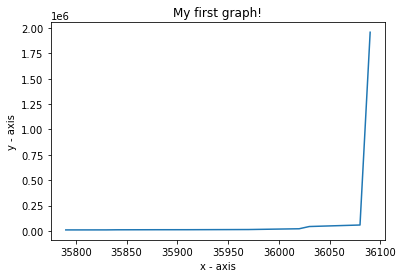

In [468]:
# importing the required module
import matplotlib.pyplot as plt
  

  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
  
# giving a title to my graph
plt.title('My first graph!')
  
# function to show the plot
plt.show()

In [276]:
(((mdf["s"]) + (mdf["b"])) / ((mdf["s"] * -1) + (mdf["b"]))) * mdf["mask"]

datetime             price
2021-06-12 18:20:00  35850    -0.000000
                     35840     1.011624
                     35830    -1.000770
                     35820    -2.579238
                     35810   -23.334867
                                ...    
2021-06-12 18:29:45  35810     1.003505
                     35800     1.000000
2021-06-12 18:30:00  35840     1.000152
                     35830     1.041892
                     35820    -0.000000
Length: 93, dtype: float64

In [279]:
((mdf["s"][:5]) + (mdf["b"][:5])) / ((mdf["s"][:5] * -1) + (mdf["b"][:5]))

datetime             price
2021-06-12 18:20:00  35850    -0.448652
                     35840     1.011624
                     35830    -1.000770
                     35820    -2.579238
                     35810   -23.334867
dtype: float64

In [260]:
(((mdf["s"]) + (mdf["b"]) / (mdf["s"] * -1) + (mdf["b"])) * mdf["mask"])[:15]

datetime             price
2021-06-12 18:20:00  35850      0.000000
                     35840   -172.185095
                     35830      0.650222
                     35820      0.519334
                     35810     -0.869468
2021-06-12 18:20:15  35830          -inf
                     35820     -2.711522
                     35810     -3.533136
2021-06-12 18:20:30  35810      1.021276
2021-06-12 18:20:45  35810      0.587916
                     35800      0.362095
2021-06-12 18:21:00  35800      0.012400
                     35790      0.335794
                     35780      1.215698
2021-06-12 18:21:15  35790     -1.678955
dtype: float64

In [239]:
((((mdf["s"] * -1) + (mdf["b"])) / ((mdf["s"]) + (mdf["b"]))) * mdf["mask"]) 

datetime             price
2021-06-12 18:20:00  35850   -0.000000
                     35840    0.988509
                     35830   -0.999231
                     35820   -0.387711
                     35810   -0.042854
                                ...   
2021-06-12 18:29:45  35810    0.996507
                     35800    1.000000
2021-06-12 18:30:00  35840    0.999848
                     35830    0.959792
                     35820   -0.000000
Length: 93, dtype: float64

In [14]:
df2a = df2[(df2['datetime'] >= '2021-06-12 18:00:20') & (df2['datetime'] <= '2021-06-12 18:30')]
df3 = pd.DataFrame(df2a.groupby(["datetime", "price", "side"])["size"].sum())

df4 = df3.sort_values(by = ['datetime','price'], ascending=[True, False])
df4

size
datetime            price    side          
2021-06-12 18:20:00 35855.39 sell  0.544552
                    35855.00 sell  2.059228
                    35850.01 buy   0.865277
                    35850.00 sell  0.023696
                    35846.21 sell  0.005000
...                                     ...
2021-06-12 18:30:00 35833.40 buy   0.023597
                    35831.84 buy   0.009173
                    35831.79 buy   0.002694
                    35825.81 buy   0.209008
                    35825.80 sell  0.012906

[625 rows x 1 columns]

In [517]:
def do(row):
    print(row.name)
    
df4.apply(lambda row: do(row), axis = 1)

(Timestamp('2021-06-12 18:00:20'), 35767.97, 'buy')
(Timestamp('2021-06-12 18:00:20'), 35764.95, 'buy')
(Timestamp('2021-06-12 18:00:20'), 35761.75, 'buy')
(Timestamp('2021-06-12 18:00:20'), 35761.74, 'sell')
(Timestamp('2021-06-12 18:00:20'), 35758.92, 'sell')
(Timestamp('2021-06-12 18:00:20'), 35757.6, 'buy')
(Timestamp('2021-06-12 18:00:20'), 35757.32, 'buy')
(Timestamp('2021-06-12 18:00:20'), 35757.31, 'buy')
(Timestamp('2021-06-12 18:00:20'), 35756.76, 'buy')
(Timestamp('2021-06-12 18:00:20'), 35754.62, 'buy')
(Timestamp('2021-06-12 18:00:20'), 35754.19, 'buy')
(Timestamp('2021-06-12 18:00:20'), 35753.77, 'buy')
(Timestamp('2021-06-12 18:00:20'), 35753.76, 'buy')
(Timestamp('2021-06-12 18:00:20'), 35753.33, 'buy')
(Timestamp('2021-06-12 18:00:20'), 35753.06, 'buy')
(Timestamp('2021-06-12 18:00:20'), 35752.9, 'sell')
(Timestamp('2021-06-12 18:00:20'), 35752.72, 'buy')
(Timestamp('2021-06-12 18:00:20'), 35752.55, 'sell')
(Timestamp('2021-06-12 18:00:20'), 35751.19, 'buy')
(Timestamp

datetime             price     side
2021-06-12 18:00:20  35767.97  buy     None
                     35764.95  buy     None
                     35761.75  buy     None
                     35761.74  sell    None
                     35758.92  sell    None
                                       ... 
2021-06-12 18:20:30  35816.42  sell    None
                     35811.01  buy     None
                     35811.00  sell    None
                     35810.32  buy     None
                     35810.31  sell    None
Length: 1439, dtype: object

In [515]:
df4.groupby(['datetime']).count()

,size
datetime,
2021-06-12 17:39:40,2
2021-06-12 17:39:50,18
2021-06-12 17:40:00,22
2021-06-12 17:40:10,11
2021-06-12 17:40:20,16
...,...
2021-06-12 18:19:50,14
2021-06-12 18:20:00,13
2021-06-12 18:20:10,15


In [501]:
df4.groupBy(['datetime'])

AttributeError: 'DataFrame' object has no attribute 'groupBy'

In [491]:
df4[:50]

size
datetime            price    side          
2021-06-12 18:20:30 35818.17 buy   0.000514
                    35818.16 sell  0.005958
                    35816.43 buy   0.000514
                    35816.42 sell  1.000000
                    35811.01 buy   0.000903
                    35811.00 sell  0.000140
                    35810.32 buy   0.079200
                    35810.31 sell  0.004304